# **CORE 4: Predicción de Calidad del Vino (Core)**


**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path='/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/WineQT.csv'
data = pd.read_csv(path)

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


**Descripción data**
1. **fixed acidity**	Acidez fija: Son ácidos no volátiles presentes naturalmente en el vino, como el tartárico. Contribuyen al sabor ácido y frescor.
2. **volatile acidity**	Acidez volátil: Principalmente ácido acético (como el del vinagre). En niveles altos puede dar un olor o sabor desagradable.
3. **citric acid**	Ácido cítrico: Ácido presente en frutas como el limón. Aporta frescor y sabor.
residual sugar	Azúcar residual: Azúcar que queda sin fermentar. Influye en la dulzura del vino.
4. **chlorides**	Cloruros: Principalmente sal (cloruro de sodio). En exceso puede afectar el sabor.
5. **free sulfur dioxide**	Dióxido de azufre libre: Parte del conservante que protege al vino de la oxidación y bacterias.
6. **total sulfur dioxide**	Dióxido de azufre total: Suma del libre y combinado. Es regulado porque en exceso puede causar problemas de salud.
7. **density**	Densidad: Relación entre la masa del vino y su volumen. Afecta la percepción en boca y puede indicar contenido de azúcar o alcohol.
8. **pH**	pH: Mide la acidez del vino. Valores bajos indican mayor acidez. Afecta el color, sabor y estabilidad.
9. **sulphates**	Sulfatos: Añadidos para ayudar a la conservación y controlar bacterias.
10. **alcohol**	Alcohol: Porcentaje de alcohol por volumen. Aporta cuerpo, dulzura y calidez.
11. **quality**	Calidad: Puntuación de calidad del vino (por ejemplo, de 0 a 10) dada por catadores o modelos sensoriales. Es la variable objetivo en muchos análisis.

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df['Id'].duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop('Id', axis=1)

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1143.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1143.0,16.0,10.0,1.0,7.0,13.0,21.0,68.0
total sulfur dioxide,1143.0,46.0,33.0,6.0,21.0,37.0,61.0,289.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


**Revisión de outliers en 'total sulfur dioxide' por mucha diferencia entre el valor del tercer cuartil (75%) y el maximo**

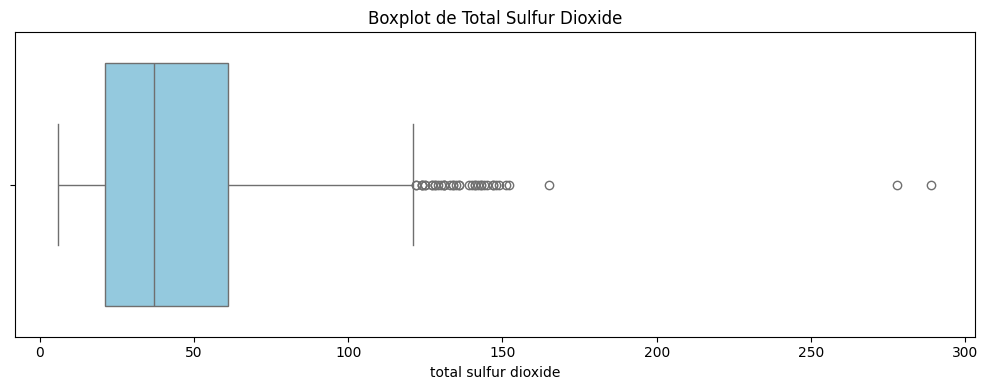

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Crear el boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['total sulfur dioxide'], color="skyblue")
plt.title("Boxplot de Total Sulfur Dioxide")
plt.xlabel("total sulfur dioxide")
plt.tight_layout()
plt.savefig("boxplot_total_sulfur_dioxide.png")
plt.show()

**Rango intercuartílico (IQR) o el 50% deel valor de los datos**

In [ ]:
#Rango intercuartílico (IQR)
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

precio_promedio = df[(df['total sulfur dioxide'] >= limite_inferior) & (df['total sulfur dioxide'] <= limite_superior)]['total sulfur dioxide'].mean()


In [ ]:
Q1

np.float64(21.0)

In [ ]:
Q3

np.float64(61.0)

In [ ]:
IQR

np.float64(40.0)

In [ ]:
limite_inferior

np.float64(-39.0)

In [ ]:
limite_superior

np.float64(121.0)

In [ ]:
precio_promedio

np.float64(42.37579329102448)

In [ ]:
#asignar el precio promedio a los outliers
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(lambda x: precio_promedio if x < limite_inferior or x > limite_superior else x)

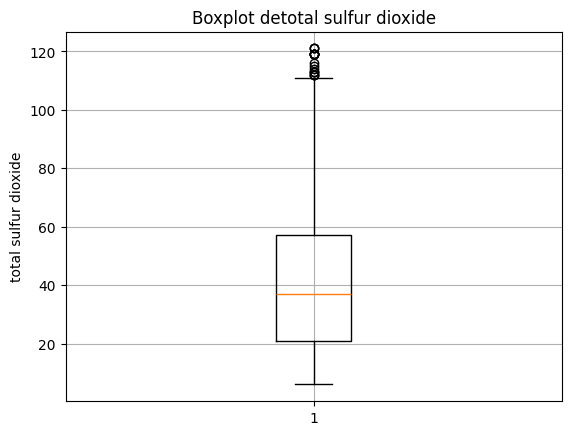

In [ ]:
import matplotlib.pyplot as plt


Sulfuro = df['total sulfur dioxide']
# Creamos el boxplot.
plt.boxplot(Sulfuro)
plt.title('Boxplot detotal sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.grid(True)
plt.show()

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1143.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1143.0,16.0,10.0,1.0,7.0,13.0,21.0,68.0
total sulfur dioxide,1143.0,42.0,26.0,6.0,21.0,37.0,57.0,121.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


**Revision de outliers en total 'sulfur dioxide'**

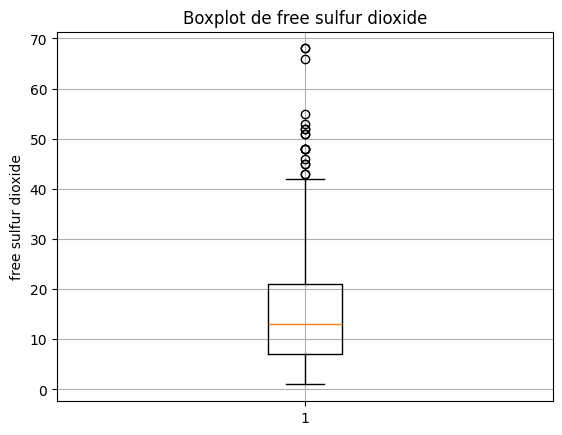

In [ ]:
Sulfuro = df['free sulfur dioxide']
# Creamos el boxplot.
plt.boxplot(Sulfuro)
plt.title('Boxplot de free sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.grid(True)
plt.show()

In [ ]:
#calcular el precio promedio
Q1 = df['free sulfur dioxide'].quantile(0.25)
Q3 = df['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

precio_promedio = df[(df['free sulfur dioxide'] >= limite_inferior) & (df['free sulfur dioxide'] <= limite_superior)]['free sulfur dioxide'].mean()

In [ ]:
#asignar el precio promedio a los outliers
df['free sulfur dioxide'] = df['free sulfur dioxide'].apply(lambda x: precio_promedio if x < limite_inferior or x > limite_superior else x)

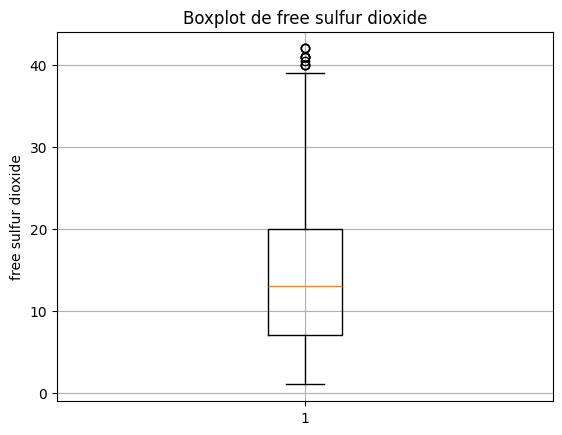

In [ ]:
Sulfuro = df['free sulfur dioxide']
# Creamos el boxplot.
plt.boxplot(Sulfuro)
plt.title('Boxplot de free sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.grid(True)
plt.show()

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1143.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1143.0,15.0,9.0,1.0,7.0,13.0,20.0,42.0
total sulfur dioxide,1143.0,42.0,26.0,6.0,21.0,37.0,57.0,121.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


**Revision de outliers en total 'residual sugar'**


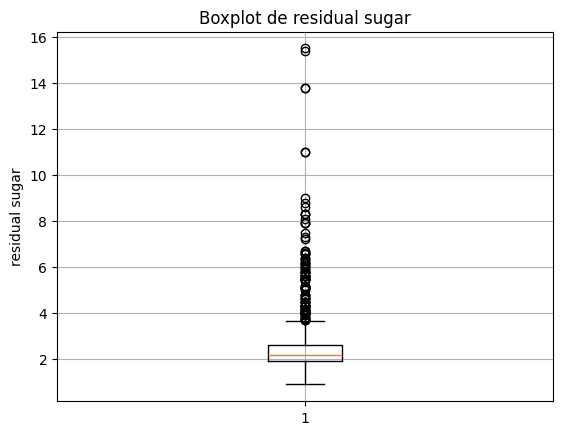

In [ ]:
Sulfuro = df['residual sugar']
# Creamos el boxplot.
plt.boxplot(Sulfuro)
plt.title('Boxplot de residual sugar')
plt.ylabel('residual sugar')
plt.grid(True)
plt.show()

In [ ]:
#calcular el precio promedio
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

precio_promedio = df[(df['residual sugar'] >= limite_inferior) & (df['residual sugar'] <= limite_superior)]['residual sugar'].mean()

In [ ]:
#asignar el precio promedio a los outliers
df['residual sugar'] = df['residual sugar'].apply(lambda x: precio_promedio if x < limite_inferior or x > limite_superior else x)

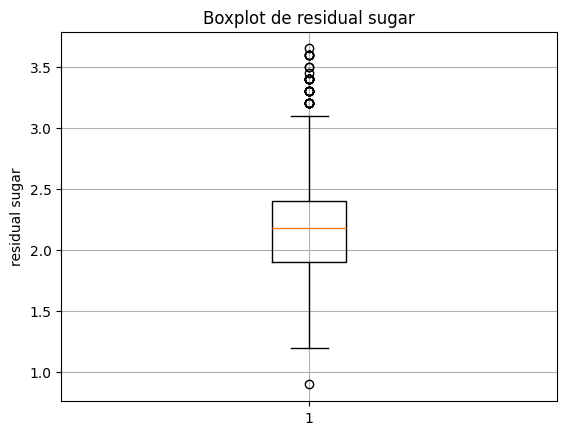

In [ ]:
Sulfuro = df['residual sugar']
# Creamos el boxplot.
plt.boxplot(Sulfuro)
plt.title('Boxplot de residual sugar')
plt.ylabel('residual sugar')
plt.grid(True)
plt.show()

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1143.0,2.0,0.0,1.0,2.0,2.0,2.0,4.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1143.0,15.0,9.0,1.0,7.0,13.0,20.0,42.0
total sulfur dioxide,1143.0,42.0,26.0,6.0,21.0,37.0,57.0,121.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


**Exportar Dataset, para ejecutar los algoritmos de ML"

In [ ]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/wine_clean.csv'

df.to_csv(path,index=False)